# Linear Regression - Predicting House Sales Price


https://www.kaggle.com/c/house-prices-advanced-regression-techniques

For this study we'll using this dataset to predict the sales price of a house.
For this purpose the ML algorithm used is Linear Regression.

### Dataset Import

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import statsmodels.api as sm
from sklearn.preprocessing import PowerTransformer

from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
arquivo_01 = 'train.csv'
arquivo_02 = 'test.csv'

df_train = pd.read_csv(arquivo_01)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Exploring Data

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
continuous_features = ['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
                      'BsmtHalfBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea',
                      'WoodDeckSF', 'OpenPorchSF', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']

In [5]:
df_cont = df_train[continuous_features]
df_cont.head()

,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,856,856,854,0,1710,1,0,...,0,2,548,0,61,0,0,0,0,208500
1,80.0,9600,0.0,1262,1262,0,0,1262,0,1,...,1,2,460,298,0,0,0,0,0,181500
2,68.0,11250,162.0,920,920,866,0,1786,1,0,...,1,2,608,0,42,0,0,0,0,223500
3,60.0,9550,0.0,756,961,756,0,1717,1,0,...,1,3,642,0,35,0,0,0,0,140000
4,84.0,14260,350.0,1145,1145,1053,0,2198,1,0,...,1,3,836,192,84,0,0,0,0,250000


In [6]:
df_cont.describe()

,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.685262,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,...,0.613014,1.767123,472.980137,94.244521,46.660274,3.409589,15.060959,2.758904,43.489041,180921.195890
std,24.284752,9981.264932,181.066207,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,...,0.644666,0.747315,213.804841,125.338794,66.256028,29.317331,55.757415,40.177307,496.123024,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,59.000000,7553.500000,0.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,...,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,69.000000,9478.500000,0.000000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,...,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,80.000000,11601.500000,166.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,...,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,1600.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,...,3.000000,4.000000,1418.000000,857.000000,547.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


In [7]:
df_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
LotFrontage     1201 non-null float64
LotArea         1460 non-null int64
MasVnrArea      1452 non-null float64
TotalBsmtSF     1460 non-null int64
1stFlrSF        1460 non-null int64
2ndFlrSF        1460 non-null int64
LowQualFinSF    1460 non-null int64
GrLivArea       1460 non-null int64
BsmtFullBath    1460 non-null int64
BsmtHalfBath    1460 non-null int64
FullBath        1460 non-null int64
HalfBath        1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
Fireplaces      1460 non-null int64
GarageCars      1460 non-null int64
GarageArea      1460 non-null int64
WoodDeckSF      1460 non-null int64
OpenPorchSF     1460 non-null int64
3SsnPorch       1460 non-null int64
ScreenPorch     1460 non-null int64
PoolArea        1460 non-null int64
MiscVal         1460 non-null int64
SalePrice       1460 non-null int64
dtypes: float64(2), int64(21)
memory usage: 262.4 KB



As features 'LotFrontage' e 'MasVnrArea' possuem valores nulos. Iremos preencher esses valores com a média dos valores encontrados nessas features.


In [8]:
df_cont[['LotFrontage', 'MasVnrArea']].describe()

,LotFrontage,MasVnrArea
count,1201.000000,1452.000000
mean,70.049958,103.685262
std,24.284752,181.066207
min,21.000000,0.000000
25%,59.000000,0.000000
50%,69.000000,0.000000
75%,80.000000,166.000000
max,313.000000,1600.000000


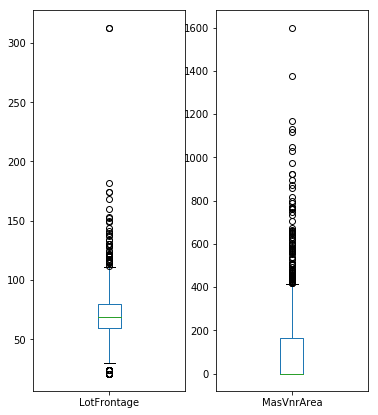

In [9]:
# Boxplot
df_cont[['LotFrontage', 'MasVnrArea']].plot(kind = 'box', subplots = True, sharex = False, sharey = False, figsize = (6, 7))
plt.show()

Os valores observados para as features acima possuem muitos valores outliers, que consequentemente afetam a media. Neste caso, antes de inputarmos estes valores iremos conferir o comportamento das variaveis em relação a variavel target.

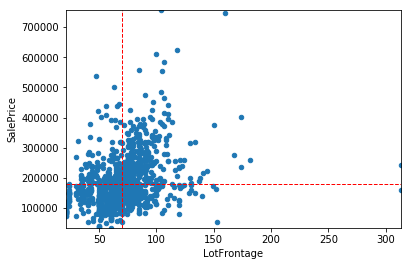

In [10]:
# Definindo o range dos valores de x e y
x_range = [df_cont['LotFrontage'].min(),df_cont['LotFrontage'].max()]
y_range = [df_cont['SalePrice'].min(),df_cont['SalePrice'].max()]


scatter_plot = df_cont.plot(kind = 'scatter', x = 'LotFrontage', y = 'SalePrice', xlim = x_range, ylim = y_range)

# Cálculo da média
meanY = scatter_plot.plot(x_range, [df_cont['SalePrice'].mean(),df_cont['SalePrice'].mean()], '--', color = 'red', linewidth = 1)
meanX = scatter_plot.plot([df_cont['LotFrontage'].mean(), df_cont['LotFrontage'].mean()], y_range, '--', color = 'red', linewidth = 1)

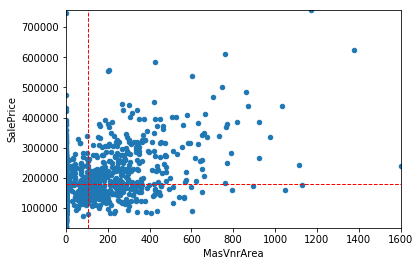

In [11]:
# Definindo o range dos valores de x e y
x_range = [df_cont['MasVnrArea'].min(),df_cont['MasVnrArea'].max()]
y_range = [df_cont['SalePrice'].min(),df_cont['SalePrice'].max()]


scatter_plot = df_cont.plot(kind = 'scatter', x = 'MasVnrArea', y = 'SalePrice', xlim = x_range, ylim = y_range)

# Cálculo da média
meanY = scatter_plot.plot(x_range, [df_cont['SalePrice'].mean(),df_cont['SalePrice'].mean()], '--', color = 'red', linewidth = 1)
meanX = scatter_plot.plot([df_cont['MasVnrArea'].mean(), df_cont['MasVnrArea'].mean()], y_range, '--', color = 'red', linewidth = 1)

Iremos seguir com o preenchimento dos dados NaN com a média dos valores em ambos os casos

In [12]:
df_cont['MasVnrArea'] = df_cont['MasVnrArea'].fillna((df_cont['MasVnrArea'].mean()))
df_cont['LotFrontage'] = df_cont['LotFrontage'].fillna((df_cont['LotFrontage'].mean()))

In [13]:
df_cont.skew()

LotFrontage      2.384950
LotArea         12.207688
MasVnrArea       2.676412
TotalBsmtSF      1.524255
1stFlrSF         1.376757
2ndFlrSF         0.813030
LowQualFinSF     9.011341
GrLivArea        1.366560
BsmtFullBath     0.596067
BsmtHalfBath     4.103403
FullBath         0.036562
HalfBath         0.675897
TotRmsAbvGrd     0.676341
Fireplaces       0.649565
GarageCars      -0.342549
GarageArea       0.179981
WoodDeckSF       1.541376
OpenPorchSF      2.364342
3SsnPorch       10.304342
ScreenPorch      4.122214
PoolArea        14.828374
MiscVal         24.476794
SalePrice        1.882876
dtype: float64

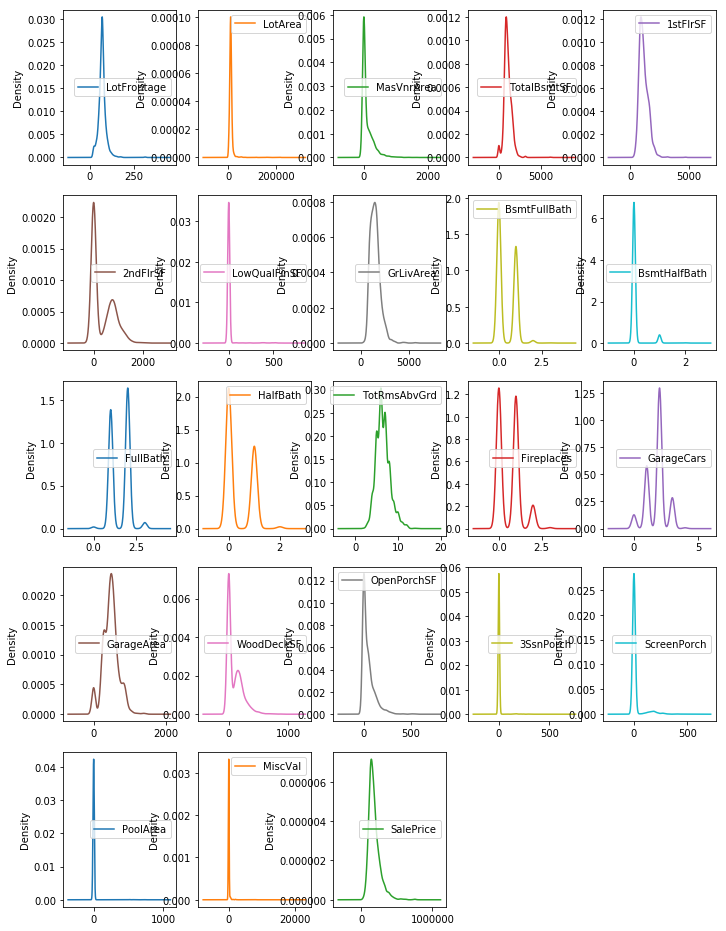

In [14]:
# Density Plots
df_cont.plot(kind = 'density',layout = (5,5), subplots = True,  sharex = False, figsize = (11.7, 16.5))
plt.show()

Para melhorar performance do nosso modelo iremos colocar os dados dentro de uma distribuição normal.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028FC1F63D30>,
      dtype=object)

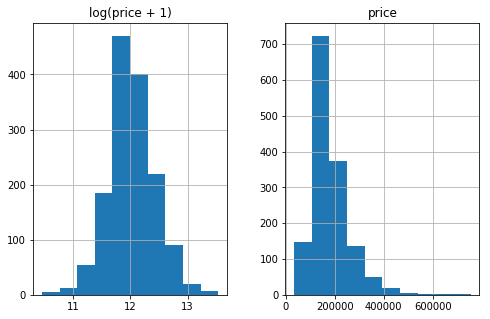

In [15]:
# Pré-Processamento dos dados
new_price = {"price":df_cont["SalePrice"], "log(price + 1)":np.log1p(df_cont["SalePrice"])}
prices = pd.DataFrame(new_price)
mpl.rcParams['figure.figsize'] = (8.0, 5.0)
prices.hist()

## Avaliação dos Dados Utilizando Stats Model

In [16]:
# Gerando número de observações e variáveis
observations = len(df_cont)
variables = df_cont.columns[:-1]

In [17]:
# Coletando x e y
X = df_cont.iloc[:,:-1]
y = df_cont['SalePrice'].values

In [18]:
Xc = sm.add_constant(X)
modelo = sm.OLS(y, Xc)
modelo_v1 = modelo.fit()

In [19]:
modelo_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     179.2
Date:                Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:52:49   Log-Likelihood:                -17605.
No. Observations:                1460   AIC:                         3.525e+04
Df Residuals:                    1438   BIC:                         3.537e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.373e+04   5947.837     -3.990      0.000   -3.54e+04   -1.21e+04
LotFrontage     11.1956     58.651      0.191      0.849    -103.855     126.247
LotArea          0.1201      0.122      0.987      0.324      -0.119       0.359
MasVnrArea      45.0413      7.016      6.419      0.000      31.278      58.805
TotalBsmtSF     39.5660      4.654      8.502      0.000      30.437      48.695
1stFlrSF        17.6549      7.233      2.441      0.015       3.466      31.844
2ndFlrSF        19.1486      6.763      2.831      0.005       5.882      32.415
LowQualFinSF    -9.4933     17.594     -0.540      0.590     -44.005      25.019
GrLivArea       27.3102      6.510      4.195      0.000      14.540      40.080
BsmtFullBath  1.373e+04   2365.823      5.805      0.000    9092.864    1.84e+04
BsmtHalfBath  1892.5126   4727.711      0.400      0.689   -7381.437    1.12e+04
FullBath      1.879e+04   2865.427      6.559      0.000    1.32e+04    2.44e+04
HalfBath      8895.5311   2965.124      3.000      0.003    3079.100    1.47e+04
TotRmsAbvGrd -1431.3022   1254.499     -1.141      0.254   -3892.147    1029.542
Fireplaces    1.013e+04   2061.114      4.915      0.000    6086.824    1.42e+04
GarageCars    2.213e+04   3350.318      6.605      0.000    1.56e+04    2.87e+04
GarageArea      13.2454     11.688      1.133      0.257      -9.681      36.172
WoodDeckSF      43.8026      9.500      4.611      0.000      25.168      62.437
OpenPorchSF     38.1525     18.093      2.109      0.035       2.661      73.644
3SsnPorch       45.6100     37.865      1.205      0.229     -28.667     119.887
ScreenPorch     41.6023     20.420      2.037      0.042       1.546      81.658
PoolArea       -44.5661     28.547     -1.561      0.119    -100.564      11.432
MiscVal          0.2047      2.232      0.092      0.927      -4.174       4.584
==============================================================================
Omnibus:                      459.864   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35402.579
Skew:                          -0.519   Prob(JB):                         0.00
Kurtosis:                      27.101   Cond. No.                     1.36e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.68e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Avaliando as associações das variaveis preditoras com a variavel de resposta através do P value, temos que as seguintes variaveis não possuem associação:
  * LotFrontage
  * LotArea      
  * LowQualFinSF
  * BsmtHalfBath
  * TotRmsAbvGr
  * GarageArea
  * 3SsnPorch
  * PoolArea
  * MiscVal

O modelo ainda apresenta possui o valor de r-square é de 0,74

## Avaliando Correlação

In [20]:
# Criando um Correlation Plot
def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar = 0)
    R[np.where(np.abs(R) < hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap = mpl.cm.coolwarm, alpha = 0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor = False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor = False)
    heatmap.axes.set_xticklabels(variables, minor = False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor = False)
    plt.tick_params(axis = 'both', which = 'both', bottom = 'off', top = 'off', left = 'off', right = 'off') 
    plt.colorbar()
    plt.show()

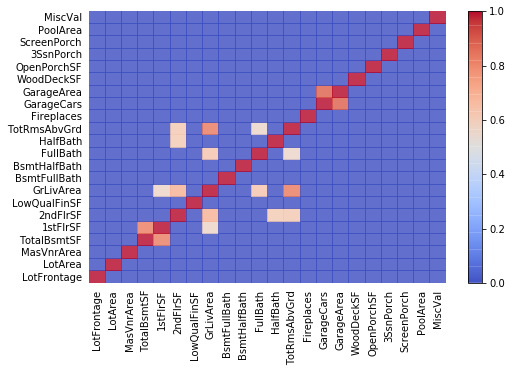

In [21]:
# Visualizando o Plot
visualize_correlation_matrix(X, hurdle = 0.5)

In [22]:
# criando lista de variaveis que possuem alta correlação

list_corr = ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']

df_cont[list_corr].corr()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,GarageCars,GarageArea
TotalBsmtSF,1.000000,0.819530,-0.174512,0.454868,0.323722,-0.048804,0.285573,0.434585,0.486665
1stFlrSF,0.819530,1.000000,-0.202646,0.566024,0.380637,-0.119916,0.409516,0.439317,0.489782
2ndFlrSF,-0.174512,-0.202646,1.000000,0.687501,0.421378,0.609707,0.616423,0.183926,0.138347
GrLivArea,0.454868,0.566024,0.687501,1.000000,0.630012,0.415772,0.825489,0.467247,0.468997
FullBath,0.323722,0.380637,0.421378,0.630012,1.000000,0.136381,0.554784,0.469672,0.405656
HalfBath,-0.048804,-0.119916,0.609707,0.415772,0.136381,1.000000,0.343415,0.219178,0.163549
TotRmsAbvGrd,0.285573,0.409516,0.616423,0.825489,0.554784,0.343415,1.000000,0.362289,0.337822
GarageCars,0.434585,0.439317,0.183926,0.467247,0.469672,0.219178,0.362289,1.000000,0.882475
GarageArea,0.486665,0.489782,0.138347,0.468997,0.405656,0.163549,0.337822,0.882475,1.000000


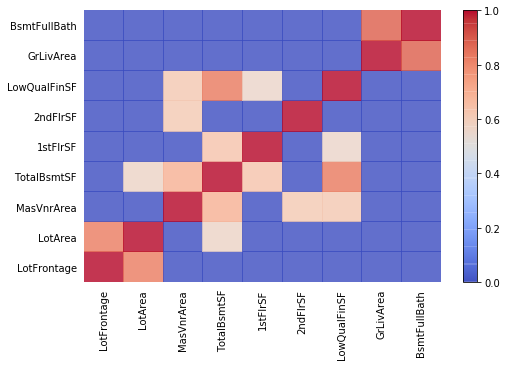

In [23]:
# Visualizando o Plot
visualize_correlation_matrix(df_cont[list_corr], hurdle = 0.5)

As variaveis destacadas acima são as que possuem maior valor de correlação. Antes de prosseguir a analise teremos que tratar possiveis problemas de multicolinearidade.
Estes valores podem fazer com que nosso modelo seja tentencioso, ja que estamos apresentando dados que podem possuir a mesma informação.

Para prosseguir com a exclusão dessas variaveis utilizaremos a tecnica de autovalores e autovetores.

## Avaliando Multicolinearidade

In [24]:
# Gerando eigenvalues e eigenvectors
corr = np.corrcoef(X, rowvar = 0)
eigenvalues, eigenvectors = np.linalg.eig(corr)

eigenvalues

array([5.36596864e+00, 2.35612731e+00, 1.37133009e+00, 1.02280386e-01,
       1.55573303e-01, 2.14813096e-01, 3.55696814e-01, 4.88997750e-01,
       1.16698376e+00, 6.20927375e-01, 6.33102380e-01, 6.43435774e-01,
       1.12093496e+00, 1.08815936e+00, 7.70083742e-01, 1.01243554e+00,
       9.90343629e-01, 9.39669931e-01, 8.44538334e-01, 8.69849466e-01,
       8.88748363e-01, 2.21238866e-16])

In [25]:
x = eigenvalues

print (x.sort)

<built-in method sort of numpy.ndarray object at 0x0000028FC1935530>


In [26]:
print (eigenvectors[:,-1])

[-4.10902850e-17  1.26240713e-16 -1.72861804e-16 -7.58227341e-16
  4.91561516e-01  5.55063077e-01  6.18261607e-02 -6.68168978e-01
 -9.02911186e-17 -1.81216735e-16  6.92203693e-16  1.24845812e-15
 -1.21383530e-16 -1.72357519e-16 -4.99585001e-16  1.70662947e-16
  7.80295989e-17 -6.47789390e-18 -5.13570284e-17 -1.62232494e-16
 -6.32899842e-17 -5.77409868e-17]


In [27]:
print (variables[0], variables[8], variables[16],variables[17], variables[18], variables[20],variables[21])

LotFrontage BsmtFullBath WoodDeckSF OpenPorchSF 3SsnPorch PoolArea MiscVal


## Avaliado o Grau de Importancia das Variaveis

In [28]:
# Criando um modelo
modelo = linear_model.LinearRegression(normalize = False, fit_intercept = True)

# Padronizando os dados
standardization = StandardScaler()

# Criando o pipelione
Stand_coef_linear_reg = make_pipeline(standardization, modelo)

In [29]:
# Treinando o modelo com dados padronizados (na mesma escala)
Stand_coef_linear_reg.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(normalize=False))])

In [30]:
# Imprimindo os coeficientes e as variáveis
for coef, var in sorted(zip(map(abs, Stand_coef_linear_reg.steps[1][1].coef_), df_cont.columns[:-1]), reverse = True):
    print ("%6.3f %s" % (coef,var))

17351.869 TotalBsmtSF
16530.939 GarageCars
13262.189 GrLivArea
10350.166 FullBath
9256.423 2ndFlrSF
8130.276 MasVnrArea
7620.232 1stFlrSF
7124.121 BsmtFullBath
6528.193 Fireplaces
5488.280 WoodDeckSF
4471.900 HalfBath
2830.962 GarageArea
2526.969 OpenPorchSF
2325.632 TotRmsAbvGrd
2318.840 ScreenPorch
1789.934 PoolArea
1336.704 3SsnPorch
1198.758 LotArea
451.688 BsmtHalfBath
361.143 LowQualFinSF
246.488 LotFrontage
101.545 MiscVal


In [31]:
def r2_est(X,y):
    return r2_score(y, Stand_coef_linear_reg.fit(X,y).predict(X))

In [32]:
print ('Coeficiente R2: %0.3f' %  r2_est(X,y))

Coeficiente R2: 0.724


In [33]:
# Gera o impacto de cada atributo no R2
r2_impact = list()
for j in range(X.shape[1]):
    selection = [i for i in range(X.shape[1]) if i!=j]
    r2_impact.append(((r2_est(X,y) - r2_est(X.values[:,selection],y)), df_cont.columns[j]))
    
for imp, varname in sorted(r2_impact, reverse = True):
    print ('%6.3f %s' %  (imp, varname))

 0.014 TotalBsmtSF
 0.008 GarageCars
 0.008 FullBath
 0.008 MasVnrArea
 0.006 BsmtFullBath
 0.005 Fireplaces
 0.004 WoodDeckSF
 0.002 HalfBath
 0.001 OpenPorchSF
 0.001 ScreenPorch
 0.000 PoolArea
 0.000 3SsnPorch
 0.000 TotRmsAbvGrd
 0.000 GarageArea
 0.000 LotArea
 0.000 BsmtHalfBath
 0.000 LotFrontage
 0.000 MiscVal
 0.000 LowQualFinSF
 0.000 GrLivArea
-0.000 2ndFlrSF
-0.000 1stFlrSF


## Remoção de Variaveis

Conforme exploração e analise acima iremos retirar do modelo as seguintes variaveis:
* LowQualFinSF
* LotFrontage
* MiscVal
* 3SsnPorch

In [34]:
df_cont_v2 = df_cont

# Lista de colunas que serão deletadas
to_drop = ['LowQualFinSF', 'LotFrontage', 'MiscVal', '3SsnPorch']

df_cont_v2 = df_cont_v2.drop(to_drop,axis='columns')

In [35]:
# Gerando número de observações e variáveis
observations_v2 = len(df_cont_v2)
variables_v2 = df_cont_v2.columns[:-1]

# Coletando x e y
X_v2 = df_cont_v2.iloc[:,:-1]
y_v2 = df_cont_v2['SalePrice'].values

Xc_v2 = sm.add_constant(X_v2)
modelo_v2 = sm.OLS(y_v2, Xc_v2)
modelo_v2 = modelo_v2.fit()

modelo_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     209.2
Date:                Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:52:50   Log-Likelihood:                -17606.
No. Observations:                1460   AIC:                         3.525e+04
Df Residuals:                    1441   BIC:                         3.535e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.334e+04   5593.692     -4.172      0.000   -3.43e+04   -1.24e+04
LotArea          0.1269      0.119      1.065      0.287      -0.107       0.361
MasVnrArea      45.0127      7.011      6.420      0.000      31.259      58.766
TotalBsmtSF     39.5080      4.645      8.505      0.000      30.395      48.621
1stFlrSF        27.4115     23.987      1.143      0.253     -19.642      74.465
2ndFlrSF        28.4283     23.793      1.195      0.232     -18.245      75.101
GrLivArea       18.1001     23.323      0.776      0.438     -27.650      63.850
BsmtFullBath  1.371e+04   2362.838      5.803      0.000    9077.201    1.83e+04
BsmtHalfBath  2090.7461   4720.202      0.443      0.658   -7168.457    1.13e+04
FullBath      1.885e+04   2851.174      6.612      0.000    1.33e+04    2.44e+04
HalfBath      8977.0091   2962.665      3.030      0.002    3165.411    1.48e+04
TotRmsAbvGrd -1469.5482   1244.237     -1.181      0.238   -3910.259     971.162
Fireplaces    1.012e+04   2059.654      4.915      0.000    6083.490    1.42e+04
GarageCars    2.212e+04   3343.915      6.616      0.000    1.56e+04    2.87e+04
GarageArea      13.5247     11.616      1.164      0.244      -9.262      36.311
WoodDeckSF      43.0176      9.454      4.550      0.000      24.472      61.563
OpenPorchSF     37.7044     18.077      2.086      0.037       2.244      73.165
ScreenPorch     40.5521     20.373      1.991      0.047       0.589      80.515
PoolArea       -44.1888     28.283     -1.562      0.118     -99.669      11.291
==============================================================================
Omnibus:                      459.373   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35127.567
Skew:                          -0.520   Prob(JB):                         0.00
Kurtosis:                      27.007   Cond. No.                     7.71e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Gradient Descent 

#### Feature Scaling

In [36]:
# Gerando os dados
observations = len(df_cont_v2)
variables = df_cont_v2.columns

In [37]:
# Aplicando Padronização
Xst = standardization.fit_transform(X_v2)
original_means = standardization.mean_
originanal_stds = standardization.scale_

In [38]:
# Gerando X e Y
Xst = np.column_stack((Xst,np.ones(observations)))
y_v2  = df_cont_v2['SalePrice'].values

In [39]:
import random
import numpy as np

def random_w( p ):
    return np.array([np.random.normal() for j in range(p)])

def hypothesis(X,w):
    return np.dot(X,w)

def loss(X,w,y):
    return hypothesis(X,w) - y

def squared_loss(X,w,y):
    return loss(X,w,y)**2

def gradient(X,w,y):
    gradients = list()
    n = float(len( y ))
    for j in range(len(w)):
        gradients.append(np.sum(loss(X,w,y) * X[:,j]) / n)
    return gradients

def update(X,w,y, alpha = 0.01):
    return [t - alpha*g for t, g in zip(w, gradient(X,w,y))]

def optimize(X,y, alpha = 0.01, eta = 10**-12, iterations = 1000):
    w = random_w(X.shape[1])
    path = list()
    for k in range(iterations):
        SSL = np.sum(squared_loss(X,w,y))
        new_w = update(X,w,y, alpha = alpha)
        new_SSL = np.sum(squared_loss(X,new_w,y))
        w = new_w
        if k>=5 and (new_SSL - SSL <= eta and new_SSL - SSL >= -eta):
            path.append(new_SSL)
            return w, path
        if k % (iterations / 20) == 0:
            path.append(new_SSL)
    return w, path                       

In [40]:
# Imprimindo o resultado                           
alpha = 0.01
w, path = optimize(Xst, y_v2, alpha, eta = 10**-12, iterations = 100000)
print ("Coeficientes finais padronizados: " + ', '.join(map(lambda x: "%0.4f" % x, w)))     

Coeficientes finais padronizados: 1266.2821, 8125.7831, 17326.9302, 10517.8034, 12320.1666, 9608.8010, 7113.1097, 499.0635, 10383.7875, 4513.8588, -2389.1045, 6524.6723, 16527.9438, 2890.3601, 5390.0051, 2497.1431, 2260.0580, -1775.1347, 180921.1959


In [41]:
# Desfazendo a Padronização
unstandardized_betas = w[:-1] / originanal_stds
unstandardized_bias  = w[-1]-np.sum((original_means / originanal_stds) * w[:-1])

In [42]:
# Imprimindo o resultado
print ('%8s: %8.4f' % ('bias', unstandardized_bias))
for beta,varname in zip(unstandardized_betas, variables):
    print ('%8s: %8.4f' % (varname, beta))

    bias: -23335.4220
 LotArea:   0.1269
MasVnrArea:  45.0164
TotalBsmtSF:  39.5091
1stFlrSF:  27.2161
2ndFlrSF:  28.2327
GrLivArea:  18.2920
BsmtFullBath: 13712.4715
BsmtHalfBath: 2091.0112
FullBath: 18854.6877
HalfBath: 8978.9951
TotRmsAbvGrd: -1470.3660
Fireplaces: 10124.4738
GarageCars: 22124.0130
GarageArea:  13.5233
WoodDeckSF:  43.0182
OpenPorchSF:  37.7022
ScreenPorch:  40.5477
PoolArea: -44.1977


Utilizando a técnica de Gradient Descent podemos averiguar que os valores para os coeficientes encontrados pelo Stats Model estão muito próximos.

## Validação do Modelo e Escolha de Features com Regressão LASSO

In [43]:
# Imports
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.linear_model import LinearRegression, Ridge, LassoCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
# Cria o modelo LASSO
modelo_lasso = LassoCV()

In [65]:
# Cross Validation para encontrar os melhores valores dos parâmetros do modelo Lasso
cross_val_score(modelo_lasso, 
                standardization.fit_transform(X), 
                y, 
                scoring = "neg_mean_squared_error", 
                cv = 5)

array([-1.35843243e+09, -1.85202256e+09, -1.88468922e+09, -1.48956197e+09,
       -3.08760732e+09])

In [66]:
# Calcula o erro do modelo
rmse_lasso = np.sqrt(-cross_val_score(modelo_lasso, 
                                      standardization.fit_transform(X), 
                                      y, 
                                      scoring = "neg_mean_squared_error", 
                                      cv = 5))
rmse_lasso

array([36856.91830836, 43035.131753  , 43413.00744477, 38594.84387994,
       55566.24262355])

In [68]:
# Valores de alpha para testar com o modelo Ridge
alphas = [1, 0.1, 0.001, 0.0005]

In [67]:
# Cria o modelo LASSO
modelo_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(standardization.fit_transform(X), y)

In [54]:
# Coeficientes LASSO
coef = pd.Series(modelo_lasso.coef_, index = df_cont.columns[:-1])
coef

LotFrontage       245.209780
LotArea          1198.394378
MasVnrArea       8129.959334
TotalBsmtSF     17351.490863
1stFlrSF        15392.448279
2ndFlrSF        18031.336782
LowQualFinSF      614.984750
GrLivArea        2695.016273
BsmtFullBath     7123.258295
BsmtHalfBath      450.570219
FullBath        10348.653550
HalfBath         4471.164741
TotRmsAbvGrd    -2319.684625
Fireplaces       6528.117669
GarageCars      16530.756563
GarageArea       2831.231831
WoodDeckSF       5487.660471
OpenPorchSF      2526.592137
3SsnPorch        1335.916768
ScreenPorch      2317.967864
PoolArea        -1788.176448
MiscVal           100.321146
dtype: float64

Text(0.5, 1.0, 'Coeficientes no Modelo LASSO')

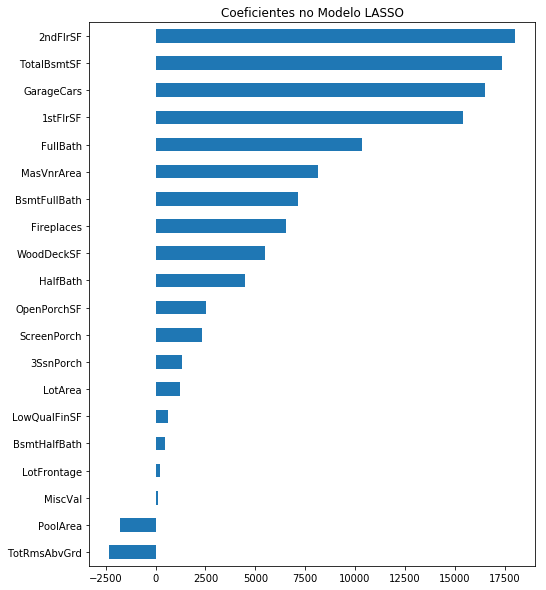

In [61]:
# Coeficientes LASSO mais relevantes e menos relevantes para o modelo
imp_coef = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])
mpl.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coeficientes no Modelo LASSO")